# 1. Import relevant libraries

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import geocoder # to get coordinates

import requests # library to handle requests
from bs4 import BeautifulSoup # library to parse HTML and XML documents

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

import folium # map rendering library

print("Libraries imported.")

Libraries imported.


# 2. Webscrapping using BeautifulSoup

In [2]:
data=requests.get('https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Mumbai').text

In [3]:
soup=BeautifulSoup(data,'html.parser')

In [4]:
area=[]
loc=[]
lat=[]
lon=[]

In [5]:
for row in soup.find('table').find_all('tr'):
    cells=row.find_all('td')
    if (len(cells)>0):
        area.append(cells[0].text)
        loc.append(cells[1].text)
        lat.append(cells[2].text)
        lon.append(cells[3].text)

Let us take a look at the various data from the table stored in the four lists.

In [6]:
area_mumbai=[]
for areas in area:
    area_mumbai.append(areas.replace('\n',''))

In [7]:
area_mumbai[0:5]

['Amboli', 'Chakala\tAndheri,', 'D.N. Nagar', 'Four Bungalows', 'Lokhandwala']

In [8]:
loc_mumbai=[]
for locations in loc:
    loc_mumbai.append(locations.replace('\n',''))

In [9]:
loc_mumbai[0:5]

['Andheri,Western Suburbs',
 'Western Suburbs',
 'Andheri,Western Suburbs',
 'Andheri,Western Suburbs',
 'Andheri,Western Suburbs']

In [10]:
lat_mumbai=[]
for lats in lat:
    lat_mumbai.append(lats.replace('\n',''))
lon_mumbai=[]
for lons in lon:
    lon_mumbai.append(lons.replace('\n',''))

In [11]:
lat_mumbai[0:5]

['19.1293', '19.111388', '19.124085', '19.124714', '19.130815']

In [12]:
lon_mumbai[0:5]

['72.8434', '72.860833', '72.831373', '72.82721', '72.82927']

Let us transform all the webscrapped data into a more readable dataframe as shown below:

In [13]:
df_mumbai=pd.DataFrame(columns=['Area','Location','Latitude','Longitude'])
df_mumbai['Area']=area_mumbai
df_mumbai['Location']=loc_mumbai
df_mumbai['Latitude']=lat_mumbai
df_mumbai['Longitude']=lon_mumbai
df_mumbai

Area  \
0                                         Amboli   
1                              Chakala\tAndheri,   
2                                     D.N. Nagar   
3                                 Four Bungalows   
4                                    Lokhandwala   
5                                          Marol   
6                                          Sahar   
7                                Seven Bungalows   
8                                        Versova   
9                                      Mira Road   
10                                     Bhayandar   
11                                         Uttan   
12                           Bandstand Promenade   
13                                      Kherwadi   
14                                     Pali Hill   
15                                   I.C. Colony   
16                                         Gorai   
17                                        Dahisa   
18                             Aarey Milk Colony   
19                                  Bangur Nagar   
20                               Jogeshwari West   
21                                          Juhu   
22                                       Charkop   
23                                        Poisar   
24                                 Mahavir Nagar   
25                                Thakur village   
26                                     Pali Naka   
27                                    Khar Danda   
28                                      Dindoshi   
29                                  Sunder Nagar   
30                                        Kalina   
31                                       Naigaon   
32                                    Nalasopara   
33                                         Virar   
34                                          Irla   
35                                    Vile Parle   
36                                       Bhandup   
37                                   Amrut Nagar   
38                                        Asalfa   
39                                    Pant Nagar   
40                                    Kanjurmarg   
41                                   Nehru Nagar   
42                                         Nahur   
43                                    Chandivali   
44                           Hiranandani Gardens   
45  Indian Institute of Technology Bombay campus   
46                                    Vidyavihar   
47                                      Vikhroli   
48                                       Chembur   
49                                        Deonar   
50                                      Mankhurd   
51                                         Mahul   
52                                      Agripada   
53                                Altamount Road   
54                                    Bhuleshwar   
55                                  Breach Candy   
56                               Carmichael Road   
57                                         Cavel   
58                                    Churchgate   
59                                  Cotton Green   
60                                  Cuffe Parade   
61                                  Cumbala Hill   
62                                   Currey Road   
63                                    Dhobitalao   
64                                        Dongri   
65                                    Kala Ghoda   
66                                  Kemps Corner   
67                                   Lower Parel   
68                                     Mahalaxmi   
69                                         Mahim   
70                                  Malabar Hill   
71                                  Marine Drive   
72                                  Marine Lines   
73                                Mumbai Central   
74                                 Nariman Point   
75                                    Prabhadevi   
76                                      

We see that row number 82 has an incorrect longitude. We google it and correct the longitude value.

In [14]:
df_mumbai['Longitude'][82]=72.8479
df_mumbai

Area  \
0                                         Amboli   
1                              Chakala\tAndheri,   
2                                     D.N. Nagar   
3                                 Four Bungalows   
4                                    Lokhandwala   
5                                          Marol   
6                                          Sahar   
7                                Seven Bungalows   
8                                        Versova   
9                                      Mira Road   
10                                     Bhayandar   
11                                         Uttan   
12                           Bandstand Promenade   
13                                      Kherwadi   
14                                     Pali Hill   
15                                   I.C. Colony   
16                                         Gorai   
17                                        Dahisa   
18                             Aarey Milk Colony   
19                                  Bangur Nagar   
20                               Jogeshwari West   
21                                          Juhu   
22                                       Charkop   
23                                        Poisar   
24                                 Mahavir Nagar   
25                                Thakur village   
26                                     Pali Naka   
27                                    Khar Danda   
28                                      Dindoshi   
29                                  Sunder Nagar   
30                                        Kalina   
31                                       Naigaon   
32                                    Nalasopara   
33                                         Virar   
34                                          Irla   
35                                    Vile Parle   
36                                       Bhandup   
37                                   Amrut Nagar   
38                                        Asalfa   
39                                    Pant Nagar   
40                                    Kanjurmarg   
41                                   Nehru Nagar   
42                                         Nahur   
43                                    Chandivali   
44                           Hiranandani Gardens   
45  Indian Institute of Technology Bombay campus   
46                                    Vidyavihar   
47                                      Vikhroli   
48                                       Chembur   
49                                        Deonar   
50                                      Mankhurd   
51                                         Mahul   
52                                      Agripada   
53                                Altamount Road   
54                                    Bhuleshwar   
55                                  Breach Candy   
56                               Carmichael Road   
57                                         Cavel   
58                                    Churchgate   
59                                  Cotton Green   
60                                  Cuffe Parade   
61                                  Cumbala Hill   
62                                   Currey Road   
63                                    Dhobitalao   
64                                        Dongri   
65                                    Kala Ghoda   
66                                  Kemps Corner   
67                                   Lower Parel   
68                                     Mahalaxmi   
69                                         Mahim   
70                                  Malabar Hill   
71                                  Marine Drive   
72                                  Marine Lines   
73                                Mumbai Central   
74                                 Nariman Point   
75                                    Prabhadevi   
76                                      

In [15]:
df_mumbai.to_csv('Mumbai neighborhood coordinates.csv')

# 3. Using Folium to visualise the areas on map of Mumbai

In [16]:
latitude=19.07 
longitude=72.87

map_mumbai = folium.Map(location=[latitude, longitude], zoom_start=11)

for lat,lon,areas,location in zip(df_mumbai['Latitude'],df_mumbai['Longitude'],df_mumbai['Area'],df_mumbai['Location']):
                                        
                                        label='{} {}'.format(areas,location)
                                        label=folium.Popup(label)
                                        
                                        folium.CircleMarker(
                                            [lat,lon], radius=5,popup=label,color='orange',fill=True,fill_color='black',fill_opacity=0.6).add_to(map_mumbai)
                                   

In [17]:
map_mumbai

# 4. Using Foursquare API to search for top 20 places within a radius of 500m

In [18]:
CLIENT_ID='ZALY0GYPRA1XXX0BZZQNLFG1C3FBIFA4E23TL4XPUSQ42G1P'
CLIENT_SECRET='XA524DRFQCWEIRUGCIHPVUOADC32EPK3OPCHFRSUERFXCPWH'
VERSION = '20180605'

In [19]:
venues = []

radius = 1000
LIMIT = 100


for lat, lon, loc,areas in zip(df_mumbai['Latitude'], df_mumbai['Longitude'], df_mumbai['Location'], df_mumbai['Area']):
    url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        lon,
        radius, 
        LIMIT)
    
    results = requests.get(url).json()["response"]['groups'][0]['items']
    
    for venue in results:
        venues.append((
            areas, 
            loc,
            lat, 
            lon, 
            venue['venue']['name'], 
            venue['venue']['location']['lat'], 
            venue['venue']['location']['lng'],  
            venue['venue']['categories'][0]['name']))

In [20]:
venues_df=pd.DataFrame(venues)
venues_df.rename(columns={0:'Area',1:'Location',2:'Area latitude',3:'Area longitude',4:'Venue name',5:'Venue latitude',6:'Venue longitude',7:'Venue category'},inplace=True)
venues_df

Area  \
0                                           Amboli   
1                                           Amboli   
2                                           Amboli   
3                                           Amboli   
4                                           Amboli   
5                                           Amboli   
6                                           Amboli   
7                                           Amboli   
8                                           Amboli   
9                                           Amboli   
10                                          Amboli   
11                                          Amboli   
12                                          Amboli   
13                                          Amboli   
14                                          Amboli   
15                                          Amboli   
16                                          Amboli   
17                                          Amboli   
18                                          Amboli   
19                                          Amboli   
20                                          Amboli   
21                                          Amboli   
22                                          Amboli   
23                                          Amboli   
24                                          Amboli   
25                                          Amboli   
26                                          Amboli   
27                                          Amboli   
28                                          Amboli   
29                                          Amboli   
30                                          Amboli   
31                                          Amboli   
32                                          Amboli   
33                               Chakala\tAndheri,   
34                               Chakala\tAndheri,   
35                               Chakala\tAndheri,   
36                               Chakala\tAndheri,   
37                               Chakala\tAndheri,   
38                               Chakala\tAndheri,   
39                               Chakala\tAndheri,   
40                               Chakala\tAndheri,   
41                               Chakala\tAndheri,   
42                               Chakala\tAndheri,   
43                               Chakala\tAndheri,   
44                               Chakala\tAndheri,   
45                               Chakala\tAndheri,   
46                               Chakala\tAndheri,   
47                               Chakala\tAndheri,   
48                               Chakala\tAndheri,   
49                               Chakala\tAndheri,   
50                               Chakala\tAndheri,   
51                               Chakala\tAndheri,   
52                               Chakala\tAndheri,   
53                               Chakala\tAndheri,   
54                               Chakala\tAndheri,   
55                               Chakala\tAndheri,   
56                               Chakala\tAndheri,   
57                               Chakala\tAndheri,   
58                               Chakala\tAndheri,   
59                               Chakala\tAndheri,   
60                               Chakala\tAndheri,   
61                               Chakala\tAndheri,   
62                               Chakala\tAndheri,   
63                               Chakala\tAndheri,   
64                               Chakala\tAndheri,   
65                               Chakala\tAndheri,   
66                               Chakala\tAndheri,   
67                               Chakala\tAndheri,   
68                               Chakala\tAndheri,   
69                               Chakala\tAndheri,   
70                               Chakala\tAndheri,   
71                               Chakala\tAndheri,   
72                               Chakala\tAndheri,   
73                               Chakala\tAndheri,

Let us check the number of unique venue categories.

In [21]:
venues_df['Venue category'].unique()

array(['Indian Restaurant', 'Falafel Restaurant', 'Mughlai Restaurant',
       'Chinese Restaurant', 'Pizza Place', 'Pub', 'Asian Restaurant',
       'Sandwich Place', 'Bar', 'Athletics & Sports', 'Coffee Shop',
       'Snack Place', 'Cocktail Bar', 'Vegetarian / Vegan Restaurant',
       'Burger Joint', 'Bowling Alley', 'Metro Station', 'Road',
       'College Cafeteria', 'Smoke Shop', 'Hotel', 'Fast Food Restaurant',
       'Seafood Restaurant', 'Café', 'Food Truck', 'Restaurant',
       'Multiplex', 'Department Store', 'Shopping Mall', 'Camera Store',
       'Gym', 'Light Rail Station', 'Ice Cream Shop', 'Juice Bar',
       'Residential Building (Apartment / Condo)', "Women's Store",
       'Diner', 'Donut Shop', 'Liquor Store', 'Gym / Fitness Center',
       'Fish Market', 'Lounge', 'Japanese Restaurant', 'Market',
       'Sports Club', 'Convenience Store', 'Pet Store', 'Hotel Bar',
       'Train Station', 'Clothing Store', 'Bus Line',
       'Comfort Food Restaurant', 'Mediterrane

# 5. Data analysis

In [22]:
len(venues_df['Venue category'].unique())

228

In [23]:
categories_onehot=pd.get_dummies(venues_df['Venue category'])

In [24]:
mumbai_category_df=pd.DataFrame(venues_df['Area'],columns=['Area'])

In [25]:
mumbai_category_df=mumbai_category_df.merge(categories_onehot,on=mumbai_category_df.index)

In [26]:
mumbai_category_df.head()

key_0    Area  ATM  Afghan Restaurant  Airport  Airport Food Court  \
0      0  Amboli    0                  0        0                   0   
1      1  Amboli    0                  0        0                   0   
2      2  Amboli    0                  0        0                   0   
3      3  Amboli    0                  0        0                   0   
4      4  Amboli    0                  0        0                   0   

   Airport Lounge  Airport Service  Airport Terminal  American Restaurant  \
0               0                0                 0                    0   
1               0                0                 0                    0   
2               0                0                 0                    0   
3               0                0                 0                    0   
4               0                0                 0                    0   

   Amphitheater  Antique Shop  Aquarium  Arcade  Art Gallery  \
0             0             0         0       0            0   
1             0             0         0       0            0   
2             0             0         0       0            0   
3             0             0         0       0            0   
4             0             0         0       0            0   

   Arts & Crafts Store  Asian Restaurant  Athletics & Sports  Auto Workshop  \
0                    0                 0                   0              0   
1                    0                 0                   0              0   
2                    0                 0                   0              0   
3                    0                 0                   0              0   
4                    0                 0                   0              0   

   Automotive Shop  BBQ Joint  Bagel Shop  Bakery  Bank  Bar  Baseball Field  \
0                0          0           0       0     0    0               0   
1                0          0           0       0     0    0               0   
2                0          0           0       0     0    0               0   
3                0          0           0       0     0    0               0   
4                0          0           0       0     0    0               0   

   Basketball Court  Beach  Bed & Breakfast  Beer Bar  Beer Garden  \
0                 0      0                0         0            0   
1                 0      0                0         0            0   
2                 0      0                0         0            0   
3                 0      0                0         0            0   
4                 0      0                0         0            0   

   Bengali Restaurant  Big Box Store  Bistro  Boat or Ferry  Bookstore  \
0                   0              0       0              0          0   
1                   0              0       0              0          0   
2                   0              0       0              0          0   
3                   0              0       0              0          0   
4                   0              0       0              0          0   

   Boutique  Bowling Alley  Breakfast Spot  Brewery  Bridal Shop  Buffet  \
0         0              0               0        0            0       0   
1         0              0               0        0            0       0   
2         0              0               0        0            0       0   
3         0              0               0        0            0       0   
4         0              0               0        0            0       0   

   Building  Burger Joint  Bus Line  Bus Station  Cafeteria  Café  \
0         0             0         0            0          0     0   
1         0             0         0            0          0     0   
2         0             0         0            0          0     0   
3         0             0         0            0          0     0   
4         0             0         0            0          0     0   

   Camera Store  Canto

In [27]:
mumbai_category_grouped=mumbai_category_df.groupby(['Area']).mean().reset_index()

In [28]:
mumbai_category_grouped.drop('key_0',axis=1,inplace=True)

In [29]:
mumbai_category_grouped.head()

Area  ATM  Afghan Restaurant  Airport  Airport Food Court  \
0  Aarey Milk Colony  0.0           0.000000      0.0                 0.0   
1           Agripada  0.0           0.000000      0.0                 0.0   
2     Altamount Road  0.0           0.000000      0.0                 0.0   
3             Amboli  0.0           0.000000      0.0                 0.0   
4        Amrut Nagar  0.0           0.019231      0.0                 0.0   

   Airport Lounge  Airport Service  Airport Terminal  American Restaurant  \
0             0.0              0.0               0.0             0.000000   
1             0.0              0.0               0.0             0.000000   
2             0.0              0.0               0.0             0.000000   
3             0.0              0.0               0.0             0.000000   
4             0.0              0.0               0.0             0.019231   

   Amphitheater  Antique Shop  Aquarium  Arcade  Art Gallery  \
0           0.0           0.0       0.0     0.0          0.0   
1           0.0           0.0       0.0     0.0          0.0   
2           0.0           0.0       0.0     0.0          0.0   
3           0.0           0.0       0.0     0.0          0.0   
4           0.0           0.0       0.0     0.0          0.0   

   Arts & Crafts Store  Asian Restaurant  Athletics & Sports  Auto Workshop  \
0                  0.0          0.000000            0.000000            0.0   
1                  0.0          0.043478            0.000000            0.0   
2                  0.0          0.000000            0.000000            0.0   
3                  0.0          0.060606            0.030303            0.0   
4                  0.0          0.038462            0.000000            0.0   

   Automotive Shop  BBQ Joint  Bagel Shop    Bakery      Bank       Bar  \
0         0.000000        0.0         0.0  0.000000  0.000000  0.000000   
1         0.000000        0.0         0.0  0.086957  0.000000  0.043478   
2         0.011364        0.0         0.0  0.056818  0.011364  0.056818   
3         0.000000        0.0         0.0  0.000000  0.000000  0.121212   
4         0.000000        0.0         0.0  0.000000  0.000000  0.000000   

   Baseball Field  Basketball Court  Beach  Bed & Breakfast  Beer Bar  \
0             0.0               0.0    0.0              0.0       0.0   
1             0.0               0.0    0.0              0.0       0.0   
2             0.0               0.0    0.0              0.0       0.0   
3             0.0               0.0    0.0              0.0       0.0   
4             0.0               0.0    0.0              0.0       0.0   

   Beer Garden  Bengali Restaurant  Big Box Store  Bistro  Boat or Ferry  \
0          0.0            0.000000            0.0     0.0            0.0   
1          0.0            0.000000            0.0     0.0            0.0   
2          0.0            0.011364            0.0     0.0            0.0   
3          0.0            0.000000            0.0     0.0            0.0   
4          0.0            0.000000            0.0     0.0            0.0   

   Bookstore  Boutique  Bowling Alley  Breakfast Spot   Brewery  Bridal Shop  \
0   0.000000       0.0       0.000000             0.0  0.000000          0.0   
1   0.000000       0.0       0.000000             0.0  0.000000          0.0   
2   0.011364       0.0       0.000000             0.0  0.011364          0.0   
3   0.000000       0.0       0.030303             0.0  0.000000          0.0   
4   0.019231       0.0       0.019231             0.0  0.019231          0.0   

   Buffet  Building  Burger Joint  Bus Line  Bus Station  Cafeteria      Café  \
0     0.0       0.0      0.000000       0.0          0.0   0.000000  0.125000   
1     0.0       0.0      0.000000       0.0          0.0   0.000000  0.000000   
2     0.0       0.0      0.000000       0.0          0.0   0.011364  0.056818   
3     0.0       0.0      0.030303       0.0          0.0   0.000000  0.000000 

# 6. Segregate the venue categories of interest

Since we are primarily interested to set up a bar, we can segregate the above dataframe into venue categories such as bars, pubs, sports bars,cocktail bar,beer bar, beer garden.

In [30]:
bar_list=['Sports Bar','Gastropub','Bar','Beer Bar',
          'Beer Garden','Club House',
          'Lounge','Cocktail Bar','Hotel Bar',
          'Bistro','Brewery','Wine Bar','Nightclub']

In [31]:
bar_category_df=pd.DataFrame(columns=[mumbai_category_grouped.columns])
bar_category_df=mumbai_category_grouped[mumbai_category_grouped['Pub']>0]

In [32]:
for i in range(0,len(bar_list)):
    bar_category_df=bar_category_df.append(mumbai_category_grouped[mumbai_category_grouped['{}'.format(bar_list[i])]>0])

In [33]:
bar_category_df.reset_index(drop=True,inplace=True)

In [34]:
bar_category_df

Area       ATM  \
0                                          Amboli  0.000000   
1                                     Amrut Nagar  0.000000   
2                                    Bangur Nagar  0.000000   
3                                     Currey Road  0.000000   
4                                      D.N. Nagar  0.000000   
5                                  Four Bungalows  0.000000   
6                             Hiranandani Gardens  0.000000   
7                                            Irla  0.000000   
8                                            Juhu  0.000000   
9                                      Kala Ghoda  0.000000   
10                                     Khar Danda  0.000000   
11                                       Kherwadi  0.000000   
12                                    Lokhandwala  0.000000   
13                                    Lower Parel  0.000000   
14                                          Nahur  0.000000   
15                                  Nariman Point  0.000000   
16                                      Pali Hill  0.000000   
17                                      Pali Naka  0.000000   
18                                Seven Bungalows  0.000000   
19                                   Sunder Nagar  0.000000   
20                                          Thane  0.000000   
21                                        Versova  0.000000   
22                                     Vile Parle  0.000000   
23                                        Bhandup  0.000000   
24                                       Mankhurd  0.000000   
25                                  Nariman Point  0.000000   
26                                 Thakur village  0.000000   
27                                          Thane  0.000000   
28                                    Amrut Nagar  0.000000   
29                                          Cavel  0.000000   
30                                        Chembur  0.000000   
31                                   Chira Bazaar  0.000000   
32                                     Churchgate  0.000000   
33                                         Deonar  0.000000   
34                                     Fanas Wadi  0.000000   
35                                   Gowalia Tank  0.000000   
36                            Hiranandani Gardens  0.000000   
37                                   Kemps Corner  0.000000   
38                                     Khar Danda  0.000000   
39                                   Marine Drive  0.000000   
40                                   Marine Lines  0.000000   
41                                  Nariman Point  0.000000   
42                                       Agripada  0.000000   
43                                 Altamount Road  0.000000   
44                                         Amboli  0.000000   
45                                     Bhuleshwar  0.000000   
46                                   Breach Candy  0.000000   
47                                Carmichael Road  0.000000   
48                                          Cavel  0.000000   
49                                        Chembur  0.000000   
50                                   Chira Bazaar  0.000000   
51                                     Churchgate  0.000000   
52                                   Cumbala Hill  0.000000   
53                                    Currey Road  0.000000   
54                                     D.N. Nagar  0.000000   
55                                    Dagdi Chawl  0.000000   
56                                         Dahisa  0.000000   
57                                    Dava Bazaar  0.000000   
58                                         Deonar  0.000000   
59                                     Dhobitalao  0.000000   
60                                       Dindoshi  0.000000   
61                                     Fanas Wadi  0.000000   
62                                 Four Bungalows  0.000000   
63           

# 5. Using KMeans clustering

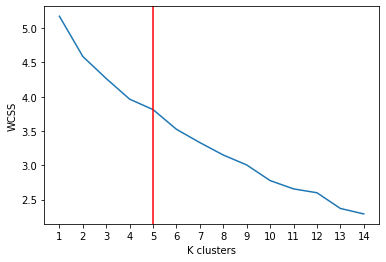

In [54]:
wcss=[]
for i in range(1,15):
    kmeans=KMeans(n_clusters=i,max_iter=300)
    kmeans.fit(bar_category_df.iloc[:,1:])
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,15),wcss)
plt.ylabel('WCSS')
plt.xlabel('K clusters')
plt.xticks(np.arange(1,15))
plt.axvline(5,color='red')


From the above elbow figure, it can't be completely determined as to what should be the optimum clusters. At k=3, the slope of WCSS reduces. Moreover, k=3 gives decent results in our analysis. Hence, we choose k=3 for further study.

In [36]:
k=5
kmeans=KMeans(n_clusters=k)
kmeans.fit(bar_category_df.iloc[:,1:])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [37]:
labels=kmeans.labels_
cluster_df=pd.DataFrame(columns=['Area','Label'])
cluster_df['Area']=bar_category_df.iloc[:,0]


In [38]:
cluster_df['Label']=labels
cluster_df.head()

Area  Label
0        Amboli      0
1   Amrut Nagar      1
2  Bangur Nagar      4
3   Currey Road      1
4    D.N. Nagar      1

In [39]:
cluster_df=cluster_df.merge(df_mumbai,on='Area')

In [40]:
cluster_df

Area  Label  \
0                                          Amboli      0   
1                                          Amboli      0   
2                                          Amboli      0   
3                                     Amrut Nagar      1   
4                                     Amrut Nagar      1   
5                                     Amrut Nagar      1   
6                                     Amrut Nagar      1   
7                                    Bangur Nagar      4   
8                                     Currey Road      1   
9                                     Currey Road      1   
10                                    Currey Road      1   
11                                    Currey Road      1   
12                                    Currey Road      1   
13                                    Currey Road      1   
14                                    Currey Road      1   
15                                     D.N. Nagar      1   
16                                     D.N. Nagar      1   
17                                     D.N. Nagar      1   
18                                     D.N. Nagar      1   
19                                 Four Bungalows      1   
20                                 Four Bungalows      1   
21                                 Four Bungalows      1   
22                                 Four Bungalows      1   
23                            Hiranandani Gardens      0   
24                            Hiranandani Gardens      0   
25                            Hiranandani Gardens      0   
26                            Hiranandani Gardens      0   
27                            Hiranandani Gardens      0   
28                                           Irla      0   
29                                           Irla      0   
30                                           Irla      0   
31                                           Irla      0   
32                                           Juhu      2   
33                                           Juhu      2   
34                                           Juhu      2   
35                                           Juhu      2   
36                                           Juhu      2   
37                                           Juhu      2   
38                                           Juhu      2   
39                                     Kala Ghoda      0   
40                                     Kala Ghoda      0   
41                                     Kala Ghoda      0   
42                                     Kala Ghoda      0   
43                                     Kala Ghoda      0   
44                                     Kala Ghoda      0   
45                                     Khar Danda      1   
46                                     Khar Danda      1   
47                                     Khar Danda      1   
48                                     Khar Danda      1   
49                                     Khar Danda      1   
50                                     Khar Danda      1   
51                                       Kherwadi      1   
52                                       Kherwadi      1   
53                                       Kherwadi      1   
54                                    Lokhandwala      1   
55                                    Lokhandwala      1   
56                                    Lokhandwala      1   
57                                    Lokhandwala      1   
58                                    Lokhandwala      1   
59                                    Lower Parel      1   
60                                    Lower Parel      1   
61                                    Lower Parel      1   
62                                    Lower Parel      1   
63                                    Lower Parel      1   
64                                    Lower Parel      1   
65                                    Lower Parel      1   
66                       

# 6. Projecting the various clusters on a folium map

In [50]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(k)
ys = [i+x+(i*x)**4 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0,1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, area,loc,cluster in zip(cluster_df['Latitude'], cluster_df['Longitude'], cluster_df['Area'], cluster_df['Location'],cluster_df['Label']):
    label = folium.Popup('{} ({}) - Cluster {}'.format(area,loc,cluster+1), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=6,
        popup=label,
        color=rainbow[cluster-2],
        fill=True,
        fill_color=rainbow[cluster-2],
        fill_opacity=0.8).add_to(map_clusters)
       
map_clusters

let us explore the various clustered areas as follows

Intitially, we used K=5 labels. In this case, two labels had only one entry each. This means we need to lower the K labels.

## Cluster 1

In [42]:
cluster_df[cluster_df['Label']==0]

Area  Label  \
0                                          Amboli      0   
1                                          Amboli      0   
2                                          Amboli      0   
23                            Hiranandani Gardens      0   
24                            Hiranandani Gardens      0   
25                            Hiranandani Gardens      0   
26                            Hiranandani Gardens      0   
27                            Hiranandani Gardens      0   
28                                           Irla      0   
29                                           Irla      0   
30                                           Irla      0   
31                                           Irla      0   
39                                     Kala Ghoda      0   
40                                     Kala Ghoda      0   
41                                     Kala Ghoda      0   
42                                     Kala Ghoda      0   
43                                     Kala Ghoda      0   
44                                     Kala Ghoda      0   
66                                          Nahur      0   
67                                          Nahur      0   
91                                          Thane      0   
92                                          Thane      0   
93                                          Thane      0   
94                                          Thane      0   
95                                          Thane      0   
96                                          Thane      0   
97                                        Versova      0   
98                                        Versova      0   
99                                        Versova      0   
112                                         Cavel      0   
113                                         Cavel      0   
114                                       Chembur      0   
115                                       Chembur      0   
116                                       Chembur      0   
117                                  Chira Bazaar      0   
118                                  Chira Bazaar      0   
123                                        Deonar      0   
124                                        Deonar      0   
125                                        Deonar      0   
126                                    Fanas Wadi      0   
127                                    Fanas Wadi      0   
128                                  Gowalia Tank      0   
129                                  Gowalia Tank      0   
130                                  Gowalia Tank      0   
131                                  Gowalia Tank      0   
136                                  Marine Drive      0   
137                                  Marine Drive      0   
138                                  Marine Lines      0   
139                                  Marine Lines      0   
140                                      Agripada      0   
141                                      Agripada      0   
142                                      Agripada      0   
146                                    Bhuleshwar      0   
155                                   Dagdi Chawl      0   
156                                   Dagdi Chawl      0   
159                                   Dava Bazaar      0   
160                                    Dhobitalao      0   
165                                  Hindu colony      0   
166                                  Hindu colony      0   
167                                   I.C. Colony      0   
168                                   I.C. Colony      0   
169                               Jogeshwari West      0   
171                                         Mahim      0   
172                                         Mahim      0   
173                                       Matunga      0   
174                                       Matunga      0   
176                      

## Cluster 2

In [43]:
cluster_df[cluster_df['Label']==1]

Area  Label                        Location   Latitude  \
3        Amrut Nagar      1       Ghatkopar,Eastern Suburbs  19.102077   
4        Amrut Nagar      1       Ghatkopar,Eastern Suburbs  19.102077   
5        Amrut Nagar      1       Ghatkopar,Eastern Suburbs  19.102077   
6        Amrut Nagar      1       Ghatkopar,Eastern Suburbs  19.102077   
8        Currey Road      1                    South Mumbai     18.994   
9        Currey Road      1                    South Mumbai     18.994   
10       Currey Road      1                    South Mumbai     18.994   
11       Currey Road      1                    South Mumbai     18.994   
12       Currey Road      1                    South Mumbai     18.994   
13       Currey Road      1                    South Mumbai     18.994   
14       Currey Road      1                    South Mumbai     18.994   
15        D.N. Nagar      1         Andheri,Western Suburbs  19.124085   
16        D.N. Nagar      1         Andheri,Western Suburbs  19.124085   
17        D.N. Nagar      1         Andheri,Western Suburbs  19.124085   
18        D.N. Nagar      1         Andheri,Western Suburbs  19.124085   
19    Four Bungalows      1         Andheri,Western Suburbs  19.124714   
20    Four Bungalows      1         Andheri,Western Suburbs  19.124714   
21    Four Bungalows      1         Andheri,Western Suburbs  19.124714   
22    Four Bungalows      1         Andheri,Western Suburbs  19.124714   
45        Khar Danda      1            khar,western Suburbs  19.068598   
46        Khar Danda      1            khar,western Suburbs  19.068598   
47        Khar Danda      1            khar,western Suburbs  19.068598   
48        Khar Danda      1            khar,western Suburbs  19.068598   
49        Khar Danda      1            khar,western Suburbs  19.068598   
50        Khar Danda      1            khar,western Suburbs  19.068598   
51          Kherwadi      1          Bandra,Western Suburbs    19.0553   
52          Kherwadi      1          Bandra,Western Suburbs    19.0553   
53          Kherwadi      1          Bandra,Western Suburbs    19.0553   
54       Lokhandwala      1         Andheri,Western Suburbs  19.130815   
55       Lokhandwala      1         Andheri,Western Suburbs  19.130815   
56       Lokhandwala      1         Andheri,Western Suburbs  19.130815   
57       Lokhandwala      1         Andheri,Western Suburbs  19.130815   
58       Lokhandwala      1         Andheri,Western Suburbs  19.130815   
59       Lower Parel      1                    South Mumbai  18.995278   
60       Lower Parel      1                    South Mumbai  18.995278   
61       Lower Parel      1                    South Mumbai  18.995278   
62       Lower Parel      1                    South Mumbai  18.995278   
63       Lower Parel      1                    South Mumbai  18.995278   
64       Lower Parel      1                    South Mumbai  18.995278   
65       Lower Parel      1                    South Mumbai  18.995278   
68     Nariman Point      1                    South Mumbai     18.926   
69     Nariman Point      1                    South Mumbai     18.926   
70     Nariman Point      1                    South Mumbai     18.926   
71     Nariman Point      1                    South Mumbai     18.926   
72     Nariman Point      1                    South Mumbai     18.926   
73     Nariman Point      1                    South Mumbai     18.926   
74     Nariman Point      1                    South Mumbai     18.926   
75         Pali Hill      1          Bandra,Western Suburbs     19.068   
76         Pali Hill      1          Bandra,Western Suburbs     19.068   
77         Pali Hill      1          Bandra,Western Suburbs     19.068   
78         Pali Hill      1          Bandra,Western Suburbs     19.068   
79         Pali Hill      1          Bandra,Western Suburbs     19.068   
80         Pali Naka      1            khar,western Suburbs  19.062742   
81         Pali Naka

## Cluster 3

In [44]:
cluster_df[cluster_df['Label']==2]

Area  Label         Location   Latitude  Longitude
32                Juhu      2  Western Suburbs       19.1      72.83
33                Juhu      2  Western Suburbs       19.1      72.83
34                Juhu      2  Western Suburbs       19.1      72.83
35                Juhu      2  Western Suburbs       19.1      72.83
36                Juhu      2  Western Suburbs       19.1      72.83
37                Juhu      2  Western Suburbs       19.1      72.83
38                Juhu      2  Western Suburbs       19.1      72.83
100         Vile Parle      2  western Suburbs       19.1      72.83
101         Vile Parle      2  western Suburbs       19.1      72.83
102         Vile Parle      2  western Suburbs       19.1      72.83
103         Vile Parle      2  western Suburbs       19.1      72.83
104         Vile Parle      2  western Suburbs       19.1      72.83
105         Vile Parle      2  western Suburbs       19.1      72.83
106         Vile Parle      2  western Suburbs       19.1      72.83
191  Chakala\tAndheri,      2  Western Suburbs  19.111388  72.860833

# Cluster 4

In [51]:
cluster_df[cluster_df['Label']==3]

Area  Label               Location Latitude Longitude
175  Nalasopara      3  Vasai,western Suburbs  19.4154   72.8613

# Cluster 5

In [52]:
cluster_df[cluster_df['Label']==4]

Area  Label                        Location   Latitude  \
7           Bangur Nagar      4        Goregaon,Western Suburbs  19.167362   
88          Sunder Nagar      4           Malad,western Suburbs     19.175   
89          Sunder Nagar      4           Malad,western Suburbs     19.175   
90          Sunder Nagar      4           Malad,western Suburbs     19.175   
108             Mankhurd      4                 Harbour Suburbs      19.05   
161             Dindoshi      4           Malad,western Suburbs  19.176382   
162             Dindoshi      4           Malad,western Suburbs  19.176382   
163             Dindoshi      4           Malad,western Suburbs  19.176382   
164             Dindoshi      4           Malad,western Suburbs  19.176382   
178               Poisar      4  Kandivali west,Western Suburbs  19.204511   
179                Sahar      4         Andheri,Western Suburbs  19.098889   
180                Sahar      4         Andheri,Western Suburbs  19.098889   
181                Sahar      4         Andheri,Western Suburbs  19.098889   
182                Sahar      4         Andheri,Western Suburbs  19.098889   
183           Vidyavihar      4                 Eastern Suburbs      19.08   
184  Bandstand Promenade      4          Bandra,Western Suburbs  19.042718   
185  Bandstand Promenade      4          Bandra,Western Suburbs  19.042718   
186  Bandstand Promenade      4          Bandra,Western Suburbs  19.042718   

     Longitude  
7    72.832252  
88      72.842  
89      72.842  
90      72.842  
108      72.93  
161  72.864891  
162  72.864891  
163  72.864891  
164  72.864891  
178  72.837639  
179  72.867222  
180  72.867222  
181  72.867222  
182  72.867222  
183     72.896  
184  72.819132  
185  72.819132  
186  72.819132

In [45]:
sizes=[]

for labels in np.arange(0,5):
    sizes.append(cluster_df[cluster_df['Label']==labels].shape[0])

In [46]:
sizes_df=pd.DataFrame(columns=['Label name','Label size'])

In [47]:
sizes_df['Label name']=np.arange(1,6)
sizes_df['Label size']=sizes

In [48]:
sizes_df.index=sizes_df['Label name']

In [49]:
sizes_df.drop('Label name', axis=1,inplace=True)
sizes_df

Label size
Label name            
1                   70
2                   91
3                   15
4                    1
5                   18